# Feature Selection

## Motivation

We are to explore and apply advanced feature selection techniques to enhance the performance of machine learning models. Feature selection is a crucial step in model development, aimed at identifying the most relevant features while reducing dimensionality. In this notebook, we focused on three prominent feature selection methods: Boruta, Maximum Relevance Minimum Redundancy (MRMR), and Tree-structured Parzen Estimator (TPE) with Optuna integration.

## Methodology:

We are to run different feature selection approaches:

1. Minimum Redundancy Maximum Relevance (SULOV)
2. All relevant (Boruta)
3. Bayessian approach (Optuna)

Then we are to train model with the selected features for each approach and challenge the base model that includes the full set of features.

Finally we are to test an ensemble approach i.e. we are to take features that appeared in at least one of the 3 feature selection method and use them to train another model.

We  are to use **CV** and validation set for chossing the model with the best performance.

## Conclusions

Interestingtly we found a feature set with All relevant aproach that has ```~3x``` less features than the initial set with a better performance. This indeed, is a great because a model with less features has many advantages like reducing the monitoring approach and is less prone to performance decay because feature drift has less impact.

| Model             | out_of_fold | roc_auc_val |
|-------------------|-------------|-------------|
| boruta [426]      | 0.792510    | 0.799865    |
| base [1147]       | 0.792896    | 0.799794    |
| ensemble [820]    | 0.792880    | 0.799627    |
| fw [329]          | 0.792347    | 0.799119    |
| optuna [555]      | 0.790210    | 0.797310    |


In [27]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from featurewiz import featurewiz as fw
from lightgbm import LGBMClassifier as lgbm
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

import sys
sys.path.append("../")

# local imports
from src.learner_params import target_column, space_column, boruta_learner_params, test_params
from utils.features_lists import all_features_list
from utils.boruta import BorutaPy

from utils.feature_selection_lists import fw_features, boruta_features, optuna_features, ensemble_features

from utils.functions__training import model_pipeline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_df = pd.read_pickle("../data/train_df.pkl")
validation_df = pd.read_pickle("../data/validation_df.pkl")

## Maximum Relevance Minimum Redundancy (MRMR) Feature Selection

**Maximum Relevance Minimum Redundancy (MRMR)** is a feature selection technique used in machine learning to identify and retain the most informative and non-redundant features for predictive modeling. It aims to strike a balance between the relevance of features to the target variable and the redundancy among selected features.

### How MRMR Works

1. **Relevance Measure**: MRMR begins by calculating a relevance measure for each feature with respect to the target variable. Common relevance measures include mutual information, information gain, or correlation.

2. **Redundancy Measure**: Next, MRMR calculates a redundancy measure between each pair of features. This measure quantifies how similar or redundant two features are in providing information.

3. **Feature Ranking**: MRMR ranks features based on a combination of their relevance and redundancy measures. Features that are highly relevant to the target variable while being minimally redundant with already selected features are given higher ranks.

4. **Sequential Selection**: MRMR performs sequential feature selection, adding features to the selected set one at a time based on their ranking. It iteratively selects the feature that provides the maximum relevance while maintaining minimal redundancy.

### SULOV in featurewiz

**SULOV (Stepwise Univarite Logistic Regression)** is a feature selection method implemented in the "featurewiz" library, which is designed to automate the feature selection process in a stepwise manner using logistic regression. MRMR can be used within SULOV to enhance the feature selection process.

**Steps in SULOV with MRMR**:

1. **Univariate Selection**: SULOV initially applies univariate feature selection to identify relevant features using a specified metric (e.g., chi-squared or F-value).

2. **MRMR Enhancement**: After univariate selection, MRMR is used to further refine the feature set by considering both relevance and redundancy. This step ensures that selected features are not only individually relevant but also collectively non-redundant.

3. **Logistic Regression**: Finally, logistic regression is applied to the selected feature set to build a predictive model. SULOV continues to iterate, adding or removing features based on model performance until a desired level of accuracy or other criteria is met.

### Advantages of MRMR

- **Balanced Selection**: MRMR aims to balance the importance of features to the target variable while avoiding redundancy among selected features.

- **Automation**: When used within libraries like "featurewiz," MRMR can automate the feature selection process, reducing manual effort.

### Limitations

- **Interpretability**: While MRMR can improve model performance, the resulting feature set may be less interpretable compared to a smaller set of manually selected features.

MRMR feature selection, especially when integrated with methods like SULOV in "featurewiz," can be a valuable approach to enhancing the quality of feature sets for machine learning tasks.


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Caution: We will try to reduce the memory usage of dataframe from 2156.55 MB
        by 67.0%. Memory usage after is: 712.05 MB
    Loaded train data. Shape = (246008, 1148)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying featu

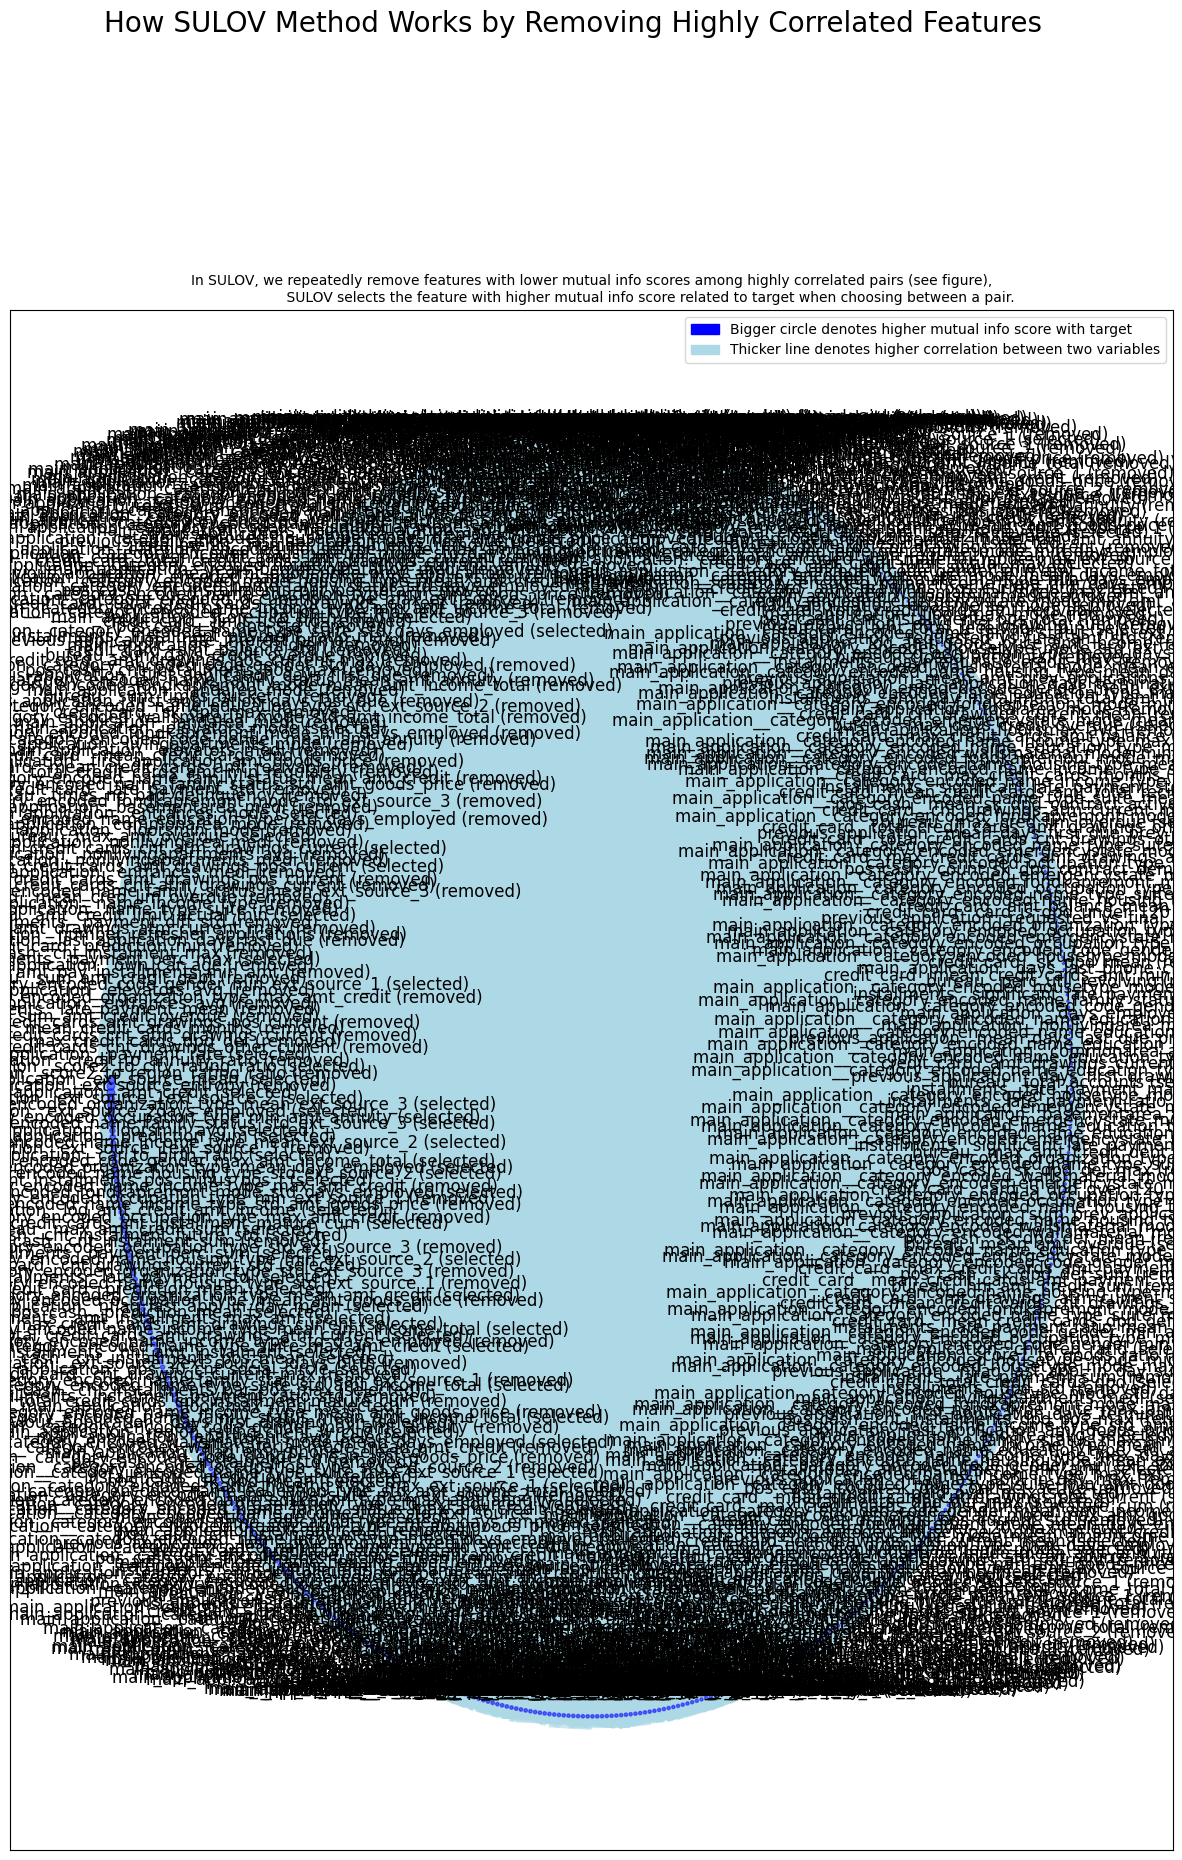

Time taken for SULOV method = 39 seconds
    Adding 0 categorical variables to reduced numeric variables  of 569
Finally 569 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 205 features per iteration...
    XGBoost version using 1.7.6 as tree method: hist
    Number of booster rounds = 20
            Time taken for regular XGBoost feature selection = 29 seconds
            Time taken for regular XGBoost feature selection = 24 seconds
            Time taken for regular XGBoost feature selection = 21 seconds
            Time taken for regular XGBoost feature selection = 15 seconds
            Time taken for regular XGBoost feature selection = 7 se

In [10]:
selector = fw(train_df[all_features_list + [target_column]],
              target_column,
              verbose = -1,
              corr_limit=.9
             )

In [11]:
sorted(selector[0])

['bureau__active_accounts',
 'bureau__active_credit_cards',
 'bureau__antiguedad_maxima_dias_closed_accounts',
 'bureau__antiguedad_maxima_dias_open_accounts',
 'bureau__antiguedad_media_dias',
 'bureau__antiguedad_media_dias_closed_accounts',
 'bureau__closed_accounts_last12m',
 'bureau__closed_credit_cards',
 'bureau__credit_debt_div_lim_cred',
 'bureau__credit_sum_by_debt',
 'bureau__credit_sum_by_overdue',
 'bureau__hhi_amt_credit_sum_debt',
 'bureau__max_amt_credit_min',
 'bureau__max_amt_credit_sum',
 'bureau__max_amt_overdue',
 'bureau__max_cred_lim_overdue',
 'bureau__max_days_credit_overdue',
 'bureau__mean_amt_credit_debt',
 'bureau__mean_amt_credit_overdue',
 'bureau__mean_amt_credit_sum',
 'bureau__mean_amt_overdue',
 'bureau__mean_consecutive_non_delinq',
 'bureau__mean_cred_lim_delinq',
 'bureau__mean_debt_active_bank_credits',
 'bureau__mean_debt_active_credit_cards',
 'bureau__open_accounts_last12m',
 'bureau__open_accounts_last2m',
 'bureau__open_accounts_last6m',
 'bu

## Boruta Feature Selection

**Boruta** is a feature selection technique used in machine learning to identify and retain the most relevant features for a predictive model. It is particularly useful when you have a large number of features, and you want to reduce dimensionality while preserving important information.

### How Boruta Works

1. **Duplicate the Dataset**: Boruta starts by duplicating the dataset, creating a shadow dataset with the same features but with randomized values.

2. **Introduce Randomness**: The shadow dataset introduces randomness, making it impossible for the feature selection algorithm to distinguish between relevant and irrelevant features.

3. **Feature Comparison**: Boruta then trains a machine learning model, such as a random forest, on both the original dataset and the shadow dataset. It compares the importance of each feature in the original dataset to that in the shadow dataset.

4. **Feature Ranking**: Features are ranked based on their importance scores. Relevant features tend to have higher scores, while irrelevant features have lower scores.

5. **Thresholding**: Boruta sets a threshold to determine which features to keep. Features with importance scores above the threshold are considered relevant and are retained, while those below the threshold are considered irrelevant and are removed.

### Advantages of Boruta

- **Model Agnostic**: Boruta can be used with various machine learning models, making it versatile and applicable to different tasks.

- **Handles Interaction Effects**: It can capture interaction effects between features, which may be missed by other feature selection methods.

- **Reduced Overfitting**: By eliminating irrelevant features, Boruta helps reduce the risk of overfitting and improves model generalization.

### Limitations

- **Computational Cost**: Running Boruta can be computationally expensive, especially with a large number of features.

- **Randomness**: Boruta relies on randomness in the shadow dataset, which means that results may vary between runs.

- **Threshold Selection**: Choosing an appropriate threshold can be subjective and may require experimentation.

Boruta is a valuable tool for feature selection, especially in cases where you need to sift through a large number of features to improve model performance and interpretability.


In [33]:
%%time
model = lgbm(**boruta_learner_params)
selector = BorutaPy(
    model,
    n_estimators=500,
    perc=20,
    alpha=0.05,
    max_iter=25,
    random_state=42,
    early_stopping=True,
    n_iter_no_change = 10,
).fit(train_df[all_features_list], train_df[target_column])

CPU times: user 7h 52min 16s, sys: 9min 26s, total: 8h 1min 42s
Wall time: 1h 28min 46s


In [36]:
sorted(np.array(all_features_list)[selector.support_])

['bureau__active_accounts',
 'bureau__active_bank_credits',
 'bureau__active_credit_cards',
 'bureau__antiguedad_maxima_dias_closed_accounts',
 'bureau__antiguedad_maxima_dias_open_accounts',
 'bureau__antiguedad_media_dias',
 'bureau__antiguedad_media_dias_closed_accounts',
 'bureau__antiguedad_media_dias_open_accounts',
 'bureau__closed_accounts',
 'bureau__closed_accounts_last12m',
 'bureau__closed_accounts_last6m',
 'bureau__closed_bank_credits',
 'bureau__closed_credit_cards',
 'bureau__credit_debt_div_lim_cred',
 'bureau__credit_lim_div_cred_overdue',
 'bureau__credit_sum_by_debt',
 'bureau__credit_sum_by_limit',
 'bureau__credit_sum_by_overdue',
 'bureau__hhi_amt_credit_sum',
 'bureau__hhi_amt_credit_sum_debt',
 'bureau__hhi_amt_credit_sum_limit',
 'bureau__max_amt_credit_debt',
 'bureau__max_amt_credit_min',
 'bureau__max_amt_credit_overdue',
 'bureau__max_amt_credit_std',
 'bureau__max_amt_credit_sum',
 'bureau__max_consecutive_non_delinq',
 'bureau__max_cred_lim_delinq',
 'bu

# Optuna

### TPE (Tree-structured Parzen Estimator) Feature Selection with Optuna

**TPE (Tree-structured Parzen Estimator)** is a Bayesian optimization algorithm used for feature selection in machine learning. It is particularly effective when you want to optimize both feature selection and hyperparameters simultaneously. TPE leverages Bayesian probability to efficiently explore the feature space and find the most relevant features for predictive modeling.

### How TPE Feature Selection Works

1. **Objective Function**: TPE starts with an objective function that combines both feature selection and model evaluation. This objective function takes a set of selected features and hyperparameters as inputs and returns a performance metric (e.g., accuracy, AUC).

2. **Initialization**: TPE begins by randomly sampling a set of features and hyperparameters to create an initial trial.

3. **Bayesian Optimization**: TPE iteratively refines the trials by leveraging Bayesian probability. It evaluates the performance of each trial and updates its probability model to predict promising feature sets and hyperparameters.

4. **Exploitation and Exploration**: TPE balances between exploitation (selecting promising trials) and exploration (sampling new trials) to efficiently search the feature space. It favors trials that have shown better performance in previous iterations.

5. **Feature Selection**: TPE selects features by iteratively including or excluding them based on their relevance to the objective function. Features that contribute positively to the objective are retained, while those that do not are gradually removed.

6. **Hyperparameter Optimization**: In parallel with feature selection, TPE optimizes hyperparameters to fine-tune the model's performance.

7. **Convergence**: TPE continues the optimization process until a stopping criterion is met, such as a predefined number of iterations or a target performance level.

### Advantages of TPE Feature Selection

- **Simultaneous Optimization**: TPE allows for the simultaneous optimization of feature selection and hyperparameters, leading to improved model performance.

- **Efficient Exploration**: TPE efficiently explores the feature space, making it suitable for high-dimensional datasets.

- **Automated**: When integrated with libraries like Optuna, TPE automates the optimization process, reducing the need for manual trial and error.

### Limitations

- **Computational Cost**: TPE can be computationally expensive, especially when optimizing both features and hyperparameters.

- **Sensitivity to Initialization**: The effectiveness of TPE can be sensitive to the initial set of trials.

- **Metric Selection**: Choosing an appropriate performance metric for the objective function is crucial for the success of TPE.

Using TPE for feature selection with Optuna allows you to harness the power of Bayesian optimization to find the most relevant features while optimizing hyperparameters for your machine learning models.


In [14]:
import optuna
from optuna import Trial
from typing import Optional
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score, make_scorer
from pandas import DataFrame, Series
import numpy as np
from lightgbm import LGBMClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

from optuna import create_study
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner, HyperbandPruner


def I(x):
    """
    Identity function
    """
    return x

def instantiate_lgbm(trial : Trial):
    params = {
        'verbose':-1,
        'objective':"binary",
        'metric':"binary_logloss",
        "n_estimators":2500,
        "learning_rate":0.05,
        'num_leaves': trial.suggest_int('num_leaves', 20, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 50, 200),
        'subsample': trial.suggest_float('subsample', .7, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', .7, 1),
        'lambda_l1':trial.suggest_float('lambda_l1',1e-2,10, log = True),
        'lambda_l2':trial.suggest_float('lambda_l2',1e-2,10, log = True),
        'n_jobs': -1,
        'random_state': 42
      }
    return LGBMClassifier(**params)

# Define the choose_columns function with the correct arguments
def choose_columns(trial: Trial, columns: list[str]) -> list[str]:
    choose = lambda column: trial.suggest_categorical(column, [True, False])
    choices = [*filter(choose, columns)]
    return choices


# Define the instantiate_processor function with the correct arguments
def instantiate_processor(trial: Trial, columns: list[str]):
    selected_columns = choose_columns(trial, columns)  # Pass the arguments to choose_columns

    processor = ColumnTransformer([
    ('numerical_pipeline', FunctionTransformer(lambda x: I(x)), selected_columns)
  ])
    return processor

# Define the instantiate_model function
def instantiate_model(trial: Trial, columns: list[str]):
    processor = instantiate_processor(trial, columns)
    # learner = LGBMClassifier(**base_learners_params)  # Use LGBMClassifier
    learner = instantiate_lgbm(trial)
    model = Pipeline([
        ('processor', processor),
        ('model', learner)
    ])
    return model

# Define the objective function before calling it
def objective(trial: Trial,
              X: DataFrame,
              y: pd.Series,
              columns: Optional[list[str]] = None,
              random_state: int = 42
             ) -> float:
    """
    """
    model = instantiate_model(trial, columns)
    kf = KFold(n_splits=3, shuffle=True, random_state=random_state)
    roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
    scores = cross_val_score(model, X, y, scoring=roc_auc_scorer, cv=kf)
    return np.min([np.mean(scores), np.median(scores)])

# Rest of your code remains the same

study = create_study(study_name='fselector',
                     direction='maximize',
                     sampler = TPESampler(seed = 42),
                     pruner=HyperbandPruner()
                    )

optuna.logging.set_verbosity(optuna.logging.WARNING)
study.optimize(lambda trial: objective(trial,
                                       train_df[all_features_list],
                                       train_df[target_column],
                                       all_features_list),
               n_trials=25,
               show_progress_bar = True
              )


  0%|          | 0/25 [00:00<?, ?it/s]

In [15]:
study.best_value

0.7814496870686553

In [26]:
dict(sorted([(k,v) for k,v in study.best_params.items() if "__" not in k]))

{'colsample_bytree': 0.7484000400398751,
 'lambda_l1': 0.02943348804225212,
 'lambda_l2': 0.34179653697362394,
 'min_child_samples': 83,
 'num_leaves': 20,
 'subsample': 0.7422355220302778}

In [16]:
# Select the columns
sorted([k for k,v in study.best_params.items() if v == True])

['bureau__antiguedad_maxima_dias_closed_accounts',
 'bureau__antiguedad_media_dias',
 'bureau__closed_accounts_last12m',
 'bureau__closed_accounts_last9m',
 'bureau__closed_bank_credits',
 'bureau__closed_credit_cards',
 'bureau__credit_lim_div_cred_overdue',
 'bureau__credit_sum_by_debt',
 'bureau__credit_sum_by_limit',
 'bureau__hhi_amt_credit_sum_limit',
 'bureau__hhi_amt_credit_sum_overdue',
 'bureau__max_amt_credit_std',
 'bureau__max_consecutive_non_delinq',
 'bureau__max_cred_lim_delinq',
 'bureau__max_cred_lim_non_delinq',
 'bureau__max_days_credit_overdue',
 'bureau__max_debt_closed_debt_others',
 'bureau__max_debt_closed_premium_loans',
 'bureau__mean_amt_credit_sum',
 'bureau__mean_consecutive_non_delinq',
 'bureau__mean_cred_lim_delinq',
 'bureau__mean_cred_lim_overdue',
 'bureau__mean_days_credit_overdue',
 'bureau__mean_debt_active_credit_cards',
 'bureau__min_amt_overdue',
 'bureau__n_unique_credit_types',
 'bureau__open_accounts_last2m',
 'bureau__open_accounts_last3m',

### Enesemble feature selection

We are to perform an additional FS process by taking the features that were considered by at least one of the three methods. So we are to remove features that were not importatn for any of the methods.

In [135]:
counter = 0
ls = {}
for feat in all_features_list:
    if feat in fw_features:
        counter+=1
    if feat in optuna_features:
        counter+=1
    if feat in boruta_features:
        counter+=1
    ls[feat] = counter
    counter = 0
importance_df = pd.DataFrame(ls.items(), columns = ["feature","n"]).sort_values(by = "n", ascending = False)

In [151]:
importance_df.n.value_counts().sort_index()

n
0    327
1    452
2    246
3    122
Name: count, dtype: int64

In [143]:
len(importance_df.query("n >=1").feature.values)

820

In [144]:
sorted(importance_df.query("n >=1").feature.values)[]

['bureau__active_accounts',
 'bureau__active_bank_credits',
 'bureau__active_credit_cards',
 'bureau__antiguedad_maxima_dias_closed_accounts',
 'bureau__antiguedad_maxima_dias_open_accounts',
 'bureau__antiguedad_media_dias',
 'bureau__antiguedad_media_dias_closed_accounts',
 'bureau__antiguedad_media_dias_open_accounts',
 'bureau__closed_accounts',
 'bureau__closed_accounts_last12m',
 'bureau__closed_accounts_last6m',
 'bureau__closed_accounts_last9m',
 'bureau__closed_bank_credits',
 'bureau__closed_credit_cards',
 'bureau__credit_debt_div_lim_cred',
 'bureau__credit_lim_div_cred_overdue',
 'bureau__credit_sum_by_debt',
 'bureau__credit_sum_by_limit',
 'bureau__credit_sum_by_overdue',
 'bureau__hhi_amt_credit_sum',
 'bureau__hhi_amt_credit_sum_debt',
 'bureau__hhi_amt_credit_sum_limit',
 'bureau__hhi_amt_credit_sum_overdue',
 'bureau__max_amt_credit_debt',
 'bureau__max_amt_credit_min',
 'bureau__max_amt_credit_overdue',
 'bureau__max_amt_credit_std',
 'bureau__max_amt_credit_sum',
 

## Performance comparison

We are to train a model using each of the feature sets, then we are to compare the performance and make the decision about which model we are to take as the final one.

The criteria would be taken using the validation set and the number of features, so we are to consider the model with the best balance between performance and number of features.

In [4]:
base_logs = model_pipeline(train_df = train_df,
                            validation_df = validation_df,
                            params = test_params,
                            target_column = target_column,
                            features = all_features_list,
                            cv = 3,
                            random_state = 42,
                            apply_shap = False
                          )

2023-09-23T12:55:28 | INFO | Starting pipeline: Generating 3 k-fold training...
2023-09-23T12:55:29 | INFO | Training for fold 1
2023-09-23T12:59:28 | INFO | Training for fold 2
2023-09-23T13:03:39 | INFO | Training for fold 3
2023-09-23T13:07:58 | INFO | CV training finished!
2023-09-23T13:07:59 | INFO | Training the model in the full dataset...
2023-09-23T13:13:40 | INFO | Training process finished!
2023-09-23T13:13:40 | INFO | Calculatinf metrics...
2023-09-23T13:13:41 | INFO | Full process finished in 18.22 minutes.


In [5]:
boruta_logs = model_pipeline(train_df = train_df,
                            validation_df = validation_df,
                            params = test_params,
                            target_column = target_column,
                            features = boruta_features,
                            cv = 3,
                            random_state = 42,
                            apply_shap = False
                          )

2023-09-23T13:13:42 | INFO | Starting pipeline: Generating 3 k-fold training...
2023-09-23T13:13:43 | INFO | Training for fold 1
2023-09-23T13:16:21 | INFO | Training for fold 2
2023-09-23T13:19:00 | INFO | Training for fold 3
2023-09-23T13:21:45 | INFO | CV training finished!
2023-09-23T13:21:45 | INFO | Training the model in the full dataset...
2023-09-23T13:25:17 | INFO | Training process finished!
2023-09-23T13:25:17 | INFO | Calculatinf metrics...
2023-09-23T13:25:17 | INFO | Full process finished in 11.61 minutes.


In [6]:
fw_logs = model_pipeline(train_df = train_df,
                            validation_df = validation_df,
                            params = test_params,
                            target_column = target_column,
                            features = fw_features,
                            cv = 3,
                            random_state = 42,
                            apply_shap = False
                          )

2023-09-23T13:25:18 | INFO | Starting pipeline: Generating 3 k-fold training...
2023-09-23T13:25:19 | INFO | Training for fold 1
2023-09-23T13:27:03 | INFO | Training for fold 2
2023-09-23T13:28:50 | INFO | Training for fold 3
2023-09-23T13:30:38 | INFO | CV training finished!
2023-09-23T13:30:38 | INFO | Training the model in the full dataset...
2023-09-23T13:32:53 | INFO | Training process finished!
2023-09-23T13:32:53 | INFO | Calculatinf metrics...
2023-09-23T13:32:53 | INFO | Full process finished in 7.60 minutes.


In [7]:
optuna_logs = model_pipeline(train_df = train_df,
                            validation_df = validation_df,
                            params = test_params,
                            target_column = target_column,
                            features = optuna_features,
                            cv = 3,
                            random_state = 42,
                            apply_shap = False
                          )

2023-09-23T13:32:55 | INFO | Starting pipeline: Generating 3 k-fold training...
2023-09-23T13:32:55 | INFO | Training for fold 1
2023-09-23T13:34:54 | INFO | Training for fold 2
2023-09-23T13:36:55 | INFO | Training for fold 3
2023-09-23T13:39:01 | INFO | CV training finished!
2023-09-23T13:39:01 | INFO | Training the model in the full dataset...
2023-09-23T13:41:39 | INFO | Training process finished!
2023-09-23T13:41:39 | INFO | Calculatinf metrics...
2023-09-23T13:41:39 | INFO | Full process finished in 8.75 minutes.


In [28]:
ensemble_logs = model_pipeline(train_df = train_df,
                            validation_df = validation_df,
                            params = test_params,
                            target_column = target_column,
                            features = ensemble_features,
                            cv = 3,
                            random_state = 42,
                            apply_shap = False
                          )

2023-09-23T14:05:39 | INFO | Starting pipeline: Generating 3 k-fold training...
2023-09-23T14:05:40 | INFO | Training for fold 1
2023-09-23T14:08:51 | INFO | Training for fold 2
2023-09-23T14:12:17 | INFO | Training for fold 3
2023-09-23T14:15:47 | INFO | CV training finished!
2023-09-23T14:15:47 | INFO | Training the model in the full dataset...
2023-09-23T14:20:28 | INFO | Training process finished!
2023-09-23T14:20:28 | INFO | Calculating metrics...
2023-09-23T14:20:28 | INFO | Full process finished in 14.85 minutes.


### Model evaluation

We are to create a table with the performance and the number of features

In [41]:
model_metrics  ={}
models = [base_logs, fw_logs, boruta_logs, optuna_logs, ensemble_logs]
names = ["base", "fw", "boruta", "optuna", "ensemble"]
sizes = [len(all_features_list), len(fw_features), len(boruta_features), len(optuna_features), len(ensemble_features)]

for model, name, size in zip(models, names, sizes):
    model_metrics[f"{name} [{size}]"] = model["metrics"]["roc_auc"]
pd.DataFrame(model_metrics).T.sort_values(by = "roc_auc_val", ascending = False)

,out_of_fold,roc_auc_val
boruta [426],0.792510,0.799865
base [1147],0.792896,0.799794
ensemble [820],0.792880,0.799627
fw [329],0.792347,0.799119
optuna [555],0.790210,0.797310
